# Language Understanding

Increasingly, we expect computers to be able to use AI in order to understand spoken or typed commands in natural language. For example, you might want to implement a home automation system that enables you to control devices in your home by using voice commands such as "switch on the light" or "put the fan on", and have an AI-powered device understand the command and take appropriate action.

![A robot listening](./images/language_understanding.jpg)

## Create Authoring and Prediction Resources

Microsoft cognitive services includes the Language Understanding service, which enables you to define *intents* that are applied to *entities* based on *utterances*. 

To use the Language Understanding service, you need two kinds of resource:

- An *authoring* resource: used to define, train, and test the language model. This must be a **Language Understanding - Authoring** resource in your Azure subscription.
- A *prediction* resource: used to publish model and handle requests from client applications that use it. This can be either a **Language Understanding** or **Cognitive Services** resource in your Azure subscription.

You can use either a **Language Understanding** or  **Cognitive Services** resource to *publish* a Language Understanding app, but you must create a separate **Language Understanding** resource for *authoring* the app.

> **Important**: Authoring resources must be created in one of three *regions* (Europe, Australia, or US). Models created in European or Australian authoring resources can only be deployed to prediction resources in Europe or Australia respectively; models created in US authoring resources can be deployed to prediction resources in any Azure location other than Europe and Australia. See the [authoring and publishing regions documentation](https://docs.microsoft.com/azure/cognitive-services/luis/luis-reference-regions) for details about matching authoring and prediction locations.

1. In another browser tab, open the Azure portal at [https://portal.azure.com](https://portal.azure.com), signing in with your Microsoft account.
2. Click **+ Create a resource**, and search for *Language Understanding*.
3. In the list of services, click **Language Understanding**.
4. In the **Language Understanding** blade, click **Create**.
5. In the **Create** blade, enter the following details and click **Create**
   - **Create option**: Both
   - **Name**: *A unique name for your service*
   - **Subscription**: *Select your Azure subscription*
   - **Resource Group**: *Select an existing resource group or create a new one*
   - **Authoring location**: *Select your preferred location*
   - **Authoring pricing tier**: F0
   - **Prediction location**: *Choose a location in the same region as your authoring location*
   - **Prediction pricing tier**: F0
   
6. Wait for the resources to be created, and note that two Language Understanding resources are provisioned; one for authoring, and another for prediction. You can view these by navigating to the resource group where you created them.

### Create a Language Understanding App

To implement natural language understanding with Language Understanding, you create an app; and then add entities, intents, and utterances to define the commands you want the app to understand:

1. In a new browser tab, open the Language Understanding portal for the authoring region where you created your authoring resource:
    - US: [https://www.luis.ai](https://www.luis.ai)
    - Europe: [https://eu.luis.ai](https://eu.luis.ai)
    - Australia: [https://au.luis.ai](https://au.luis.ai)

2. Sign in using the Microsoft account associated with your Azure subscription. If this is the first time you have signed into the Language Understanding portal, you may need to grant the app some permissions to access your account details. Then complete the *Welcome* steps by selecting the existing Language Understanding authoring resource you just created in your Azure subscription. 

3. Open the **Conversation Apps** page, and select your subscription and Language Understanding authoring resource. Then create a new app for conversation with the following settings:
   - **Name**: Home Automation
   - **Culture**: English (*if this option is not available, leave it blank*)
   - **Description**: Simple home automation
   - **Prediction resource**: *Your Language Understanding prediction resource*

4. If a panel with tips for creating an effective Language Understanding app is displayed, close it.

### Create an Entity

An *entity* is a thing that your language model can identify and do something with. In this case, your Language Understanding app will be used to control various *devices* in the office, such as lights or fans; so you'll create a *device* entity that includes a list of the types of device that you want the app to work with. For each device type, you'll create a sublist that identifies the name of the device (for example *light*) and any synonyms that might be used to refer to this type of device (for example *lamp*).

1. In the Language Understanding page for your app, in the pane on the left, click **Entities**. Then click **Create**, and create a new entity named **device**, select the **List** type, and click **Create**.
2. In the **List items** page, under **Normalized Values**, type **light**, then press ENTER.
3. After the **light** value has been added, under **Synonyms**, type **lamp** and press ENTER.
4. Add a second list item named **fan** with the synonym **AC**.

> **Note**: For this lab, use the exact lowercase or uppercase text as instructed _(example: light **not** Light)_ and do not add extra spaces. 

### Create Intents

An *intent* is an action you want to perform on one or more entities - for example, you might want to switch a light on, or turn a fan off. In this case, you'll define two intents: one to switch a device on, and another to switch a device off. For each intent, you'll specify sample *utterances* that indicate the kind of language used to indicate the intent.

> **Note**: For this lab, please use the exact lowercase or uppercase text as instructed _(example: "turn the light on" **not** "Turn the light on .")_ and do not add extra spaces. 

1. In the pane on the left, click **Intents**. Then click **Create**, and add an intent with the name **switch_on** and click **Done**.
2. Under the **Examples** heading and the **Example user input** subheading, type the utterance ***turn the light on*** and press **Enter** to submit this utterance to the list.
3. In the *turn the light on* utterance, click the word "light", and assign it to the **device** entity's **light** value.

![How to assign the word "light" to the entity value.](./images/assign_entity.jpg)

4. Add a second utterance to the **switch_on** intent, with the phrase ***turn the fan on***. Then assign the word "fan" to the **device** entity's **fan** value.
5. In the pane on the left, click **Intents** and click **Create**, to add a second intent with the name **switch_off**.
6. In the **Utterances** page for the **switch_off** intent, add the utterance ***turn the light off*** and assign the word "light" to the **device** entity's **light** value.
7. Add a second utterance to the **switch_off** intent, with the phrase ***turn the fan off***. Then connect the word "fan" to the **device** entity's **fan** value.

### Train and Test the Language Model

Now you're ready to use the data you've provided in the form of entities, intents, and utterances to train the language model for your app.

1. At the top of the Language Understanding page for your app, click **Train** to train the language model
2. When the model is trained, click **Test**, and use the Test pane to view the predicted intent for the following phrases:
    * *switch the light on*
    * *turn off the fan*
    * *turn the lamp off*
    * *switch on the AC*
3. Close the Test pane.
    
### Publish the Model and Configure Endpoints

To use your trained model in a client application, you must publish it as an endpoint to which the client applications can send new utterances; from which intents and entitites will be predicted.

1. At the top of the Language Understanding page for your app, click **Publish**. Then select **Production slot** and click **Done**.

2. After the model has been published, at the top of the Language Understanding page for your app, click **Manage**. Then on the **Settings** tab, note the **App ID** for your app. Copy this and paste it in the code below to replace **YOUR_LU_APP_ID**.

3. On the **Azure Resources** tab, note the **Primary key** and **Endpoint URL** for your prediction resource. Copy these and paste them into the code below, replacing **YOUR_LU_KEY** and **YOUR_LU_ENDPOINT**.

4. Run the cell below by clicking its **Run cell** (&#9655;) button (to the left of the cell), and when prompted, enter the text *turn the light on*. The text is interpreted by your Language Understanding model and an appropriate image is displayed.

### **(!) Important**: 
Look for the prompt at the top of your window. You will need to type *turn the light on* and press **enter**. 


put the lamp off
- predicted intent: switch_off
- predicted entity: light


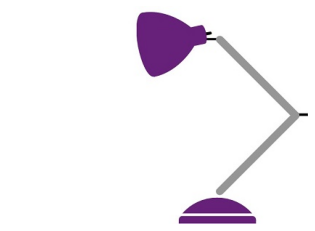

In [6]:
from python_code import luis
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

try:
    # Set up API configuration
    luis_app_id = '9c6ac0ae-c444-47c8-9eb0-b80500cf4710'
    luis_key = '032cb7f58764411ab9e2d3b5afe81094'
    luis_endpoint = 'https://crystalbel-lu.cognitiveservices.azure.com/'

    # prompt for a command
    command = input('Please enter a command: \n')

    # get the predicted intent and entity (code in python_code.home_auto.py)
    action = luis.get_intent(luis_app_id, luis_key, luis_endpoint, command)

    # display an appropriate image
    img_name = action + '.jpg'
    img = Image.open(os.path.join("data", "luis" ,img_name))
    plt.axis('off')
    plt. imshow(img)
except Exception as ex:
    print(ex)

### (!) Check In 
Did you run the cell above, then type the phrase *turn the light on* when prompted? The prompt will appear at the top of your window.  

Re-run the cell above, trying the following phrases:

* *turn on the light*
* *put the lamp off*
* *switch the fan on*
* *switch the light on*
* *switch off the light*
* *turn off the fan*
* *switch the AC on*

If you ran the cell above and it displayed question mark image, you may have used slightly different text or spacing than instructed when you created an entity, intent, or utterance.

> **Note**: If you're curious about the code used to retrieve the intents and entitites from your Language Understanding app, look at the **luis.py** file in the **python_code** folder.

## Add Voice Control

So far, we've seen how analyze text; but increasingly AI systems enable humans to communicate with software services through speech recognition. To support this, the **Speech** cognitive service provides a simple way to transcribe spoken language into text.

### Create a Cognitive Services Resource

If you don't already have one, use the following steps to create a **Cognitive Services** resource in your Azure subscription:

> **Note**: If you already have a Cognitive Services resource, just open its **Quick start** page in the Azure portal and copy its key and location to the cell below. Otherwise, follow the steps below to create one.

1. In another browser tab, open the Azure portal at [https://portal.azure.com](https://portal.azure.com), signing in with your Microsoft account.
2. Click the **&#65291;Create a resource** button, search for *Cognitive Services*, and create a **Cognitive Services** resource with the following settings:
    - **Subscription**: *Your Azure subscription*.
    - **Resource group**: *Select or create a resource group with a unique name*.
    - **Region**: *Choose any available region*:
    - **Name**: *Enter a unique name*.
    - **Pricing tier**: S0
    - **By checking this box, I certify that use of this service is not by or for a police department in the United States**: Selected.
    - **I confirm I have read and understood the notices**: Selected.
3. Wait for deployment to complete. Then go to your cognitive services resource, and on the **Quick start** page, note the keys and location. You will need these to connect to your cognitive services resource from client applications.

### Get the Key and Location for your Cognitive Services Resource

To use your cognitive services resource, client applications need its authentication key and location:

1. In the Azure portal, on the **Keys and Endpoint** page for your cognitive service resource, copy the **Key1** for your resource and paste it in the code below, replacing **YOUR_COG_KEY**.
2. Copy the **Location** for your resource and paste it in the code below, replacing **YOUR_COG_LOCATION**.
>**Note**: Stay on the **Keys and Endpoint** page and copy the **Location** from this page (example: _westus_). Please _do not_ add spaces between words for the Location field. 
3. Run the code in the cell below. 

In [7]:
cog_key = '7eee470719574d12b0b955991051017e'
cog_location = 'southeastasia'

print('Ready to use cognitive services in {} using key {}'.format(cog_location, cog_key))

Ready to use cognitive services in southeastasia using key 7eee470719574d12b0b955991051017e


Now run the cell below to transcribe speech from an audio file, and use it as a command for your Language Understanding app.

Turn the light off.
- predicted intent: switch_off
- predicted entity: light


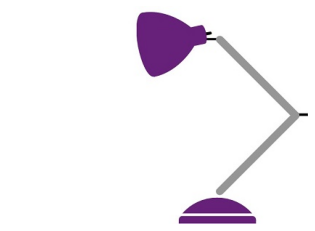

In [9]:
import os
from python_code import luis
from azure.cognitiveservices.speech import SpeechConfig, SpeechRecognizer, AudioConfig
from playsound import playsound
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

try:   

    # Get spoken command from audio file
    file_name = 'light-off.wav'
    audio_file = os.path.join('data', 'luis', file_name)

    # Configure speech recognizer
    speech_config = SpeechConfig(cog_key, cog_location)
    audio_config = AudioConfig(filename=audio_file) # Use file instead of default (microphone)
    speech_recognizer = SpeechRecognizer(speech_config, audio_config)

    # Use a one-time, synchronous call to transcribe the speech
    speech = speech_recognizer.recognize_once()

    # Get the predicted intent and entity (code in python_code.home_auto.py)
    action = luis.get_intent(luis_app_id, luis_key, luis_endpoint, speech.text)

    # Get the appropriate image
    img_name = action + '.jpg'

    # Display image 
    img = Image.open(os.path.join("data", "luis" ,img_name))
    plt.axis('off')
    plt. imshow(img)
    playsound(audio_file)

except Exception as ex:
    print(ex)

Try modifying the cell above to use the **light-off.wav** audio file.

## Learn More

Learn more about Language Understanding in the [service documentation](https://docs.microsoft.com/azure/cognitive-services/luis/)